In [1]:
# importing libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt


For my subsequent analysis, I'm utilizing a dataset that has been segmented based on the RFM (Recency, Frequency, Monetary) analysis. This segmentation approach allows me to categorize and analyze customers more effectively, taking into account their transaction behavior and patterns.

In [2]:
customer_set_w_segments = pd.read_pickle('../data/customer_segment_data.pkl')

In [3]:
customer_set_w_segments

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country,recency,frequency,monetary,r_rank_norm,f_rank_norm,m_rank_norm,rfm_score,customer_segmentation
0,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,1.25,24,30.00,2010-12-01 08:45:00,u12583,France,2,17,6629.34,95.490219,95.462963,96.087963,4.8,top_customer
1,536385,22783,SET 3 WICKER OVAL BASKETS W LIDS,19.95,1,19.95,2010-12-01 09:56:00,u1742,United Kingdom,49,3,598.83,50.286986,54.340278,46.875000,2.5,low_value_customer
2,536392,22128,PARTY CONES CANDY ASSORTED,1.25,12,15.00,2010-12-01 10:29:00,u13705,United Kingdom,7,3,711.86,87.560033,54.340278,53.101852,3.0,low_value_customer
3,536404,22469,HEART OF WICKER SMALL,1.65,12,19.80,2010-12-01 11:29:00,u16218,United Kingdom,29,8,3054.87,62.152981,84.745370,88.055556,4.1,high_value_customer
4,536412,22274,FELTCRAFT DOLL EMILY,2.95,2,5.90,2010-12-01 11:49:00,u1792,United Kingdom,3,17,4107.60,92.854633,95.462963,92.384259,4.7,top_customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399317,581476,22998,TRAVEL CARD WALLET KEEP CALM,0.42,72,30.24,2011-12-09 08:48:00,u12433,Norway,0,7,13375.87,100.000000,81.689815,98.611111,4.7,top_customer
399318,581478,23126,DOLLCRAFT GIRL AMELIE,4.95,4,19.80,2011-12-09 08:59:00,u17364,United Kingdom,0,12,4437.23,100.000000,91.782407,93.078704,4.7,top_customer
399319,581493,79190B,RETRO PLASTIC POLKA TRAY,0.42,15,6.30,2011-12-09 10:10:00,u12423,Belgium,0,9,1624.11,100.000000,87.013889,75.300926,4.2,high_value_customer
399320,581501,22807,SET OF 6 T-LIGHTS TOADSTOOLS,1.25,12,15.00,2011-12-09 10:46:00,u12985,United Kingdom,0,3,1215.62,100.000000,54.340278,68.125000,3.5,medium_value_customer


# Cohort Retention Analysis

In [4]:
# Define a function that will parse the date
def get_month(x): return pd.to_datetime(x).date()

# Create InvoiceDay column
customer_set_w_segments['invoice_month'] = customer_set_w_segments['invoice_date'].apply(get_month) 

# Group by CustomerID and select the InvoiceDay value
grouping = customer_set_w_segments.groupby('customer_id')['invoice_month'] 

# Assign a minimum InvoiceDay value to the dataset
customer_set_w_segments['cohort_month'] = grouping.transform('min')

# View the modified DataFrame
customer_set_w_segments

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country,recency,frequency,monetary,r_rank_norm,f_rank_norm,m_rank_norm,rfm_score,customer_segmentation,invoice_month,cohort_month
0,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,1.25,24,30.00,2010-12-01 08:45:00,u12583,France,2,17,6629.34,95.490219,95.462963,96.087963,4.8,top_customer,2010-12-01,2010-12-01
1,536385,22783,SET 3 WICKER OVAL BASKETS W LIDS,19.95,1,19.95,2010-12-01 09:56:00,u1742,United Kingdom,49,3,598.83,50.286986,54.340278,46.875000,2.5,low_value_customer,2010-12-01,2010-12-01
2,536392,22128,PARTY CONES CANDY ASSORTED,1.25,12,15.00,2010-12-01 10:29:00,u13705,United Kingdom,7,3,711.86,87.560033,54.340278,53.101852,3.0,low_value_customer,2010-12-01,2010-12-01
3,536404,22469,HEART OF WICKER SMALL,1.65,12,19.80,2010-12-01 11:29:00,u16218,United Kingdom,29,8,3054.87,62.152981,84.745370,88.055556,4.1,high_value_customer,2010-12-01,2010-12-01
4,536412,22274,FELTCRAFT DOLL EMILY,2.95,2,5.90,2010-12-01 11:49:00,u1792,United Kingdom,3,17,4107.60,92.854633,95.462963,92.384259,4.7,top_customer,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399317,581476,22998,TRAVEL CARD WALLET KEEP CALM,0.42,72,30.24,2011-12-09 08:48:00,u12433,Norway,0,7,13375.87,100.000000,81.689815,98.611111,4.7,top_customer,2011-12-09,2010-12-01
399318,581478,23126,DOLLCRAFT GIRL AMELIE,4.95,4,19.80,2011-12-09 08:59:00,u17364,United Kingdom,0,12,4437.23,100.000000,91.782407,93.078704,4.7,top_customer,2011-12-09,2011-01-12
399319,581493,79190B,RETRO PLASTIC POLKA TRAY,0.42,15,6.30,2011-12-09 10:10:00,u12423,Belgium,0,9,1624.11,100.000000,87.013889,75.300926,4.2,high_value_customer,2011-12-09,2010-12-21
399320,581501,22807,SET OF 6 T-LIGHTS TOADSTOOLS,1.25,12,15.00,2011-12-09 10:46:00,u12985,United Kingdom,0,3,1215.62,100.000000,54.340278,68.125000,3.5,medium_value_customer,2011-12-09,2011-11-11


In [5]:
# Convert columns to datetime
customer_set_w_segments['invoice_month'] = pd.to_datetime(customer_set_w_segments['invoice_month'])
customer_set_w_segments['cohort_month'] = pd.to_datetime(customer_set_w_segments['cohort_month'])

# Calculate difference in years
years_diff = customer_set_w_segments['invoice_month'].dt.year - customer_set_w_segments['cohort_month'].dt.year

# Calculate difference in months
months_diff = customer_set_w_segments['invoice_month'].dt.month - customer_set_w_segments['cohort_month'].dt.month

# Calculate cohort index
customer_set_w_segments['cohort_index'] = years_diff * 12 + months_diff + 1

In [6]:

# Convert 'cohort_month' to datetime if it's not already in datetime format
customer_set_w_segments['cohort_month'] = pd.to_datetime(customer_set_w_segments['cohort_month'])

# Extract year and month from 'cohort_month' and create a new column 'cohort_year_month'
customer_set_w_segments['cohort_year_month'] = customer_set_w_segments['cohort_month'].dt.strftime('%Y-%m')

# Create a groupby object using 'cohort_year_month' and 'cohort_index'
grouping = customer_set_w_segments.groupby(['cohort_year_month', 'cohort_index'])

# Calculate the average of the 'customer_id' column
cohort_data = grouping['customer_id'].apply(pd.Series.nunique)

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Pivot the data
cohort_counts = cohort_data.pivot(index='cohort_year_month', columns='cohort_index', values='customer_id')

# Display the pivot table
cohort_counts


cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_year_month,,,,,,,,,,,,,
2010-12,926.0,360.0,312.0,366.0,339.0,375.0,357.0,333.0,334.0,373.0,353.0,473.0,258.0
2011-01,416.0,99.0,119.0,102.0,136.0,126.0,110.0,107.0,129.0,145.0,155.0,63.0,NaN
2011-02,375.0,93.0,73.0,107.0,102.0,93.0,98.0,105.0,98.0,119.0,35.0,NaN,NaN
2011-03,438.0,83.0,111.0,96.0,100.0,78.0,115.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,298.0,67.0,66.0,63.0,62.0,71.0,68.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,278.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,43.0,64.0,58.0,78.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,185.0,40.0,38.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,41.0,41.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Calculate retention rate

cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3) * 100

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_year_month,,,,,,,,,,,,,
2010-12,100.0,38.9,33.7,39.5,36.6,40.5,38.6,36.0,36.1,40.3,38.1,51.1,27.9
2011-01,100.0,23.8,28.6,24.5,32.7,30.3,26.4,25.7,31.0,34.9,37.3,15.1,NaN
2011-02,100.0,24.8,19.5,28.5,27.2,24.8,26.1,28.0,26.1,31.7,9.3,NaN,NaN
2011-03,100.0,18.9,25.3,21.9,22.8,17.8,26.3,23.7,28.8,8.9,NaN,NaN,NaN
2011-04,100.0,22.5,22.1,21.1,20.8,23.8,22.8,26.2,8.4,NaN,NaN,NaN,NaN
2011-05,100.0,23.7,17.3,17.3,21.6,24.5,26.6,10.4,NaN,NaN,NaN,NaN,NaN
2011-06,100.0,20.9,18.3,27.2,24.7,33.2,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,21.6,20.5,23.8,28.1,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,24.6,24.6,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


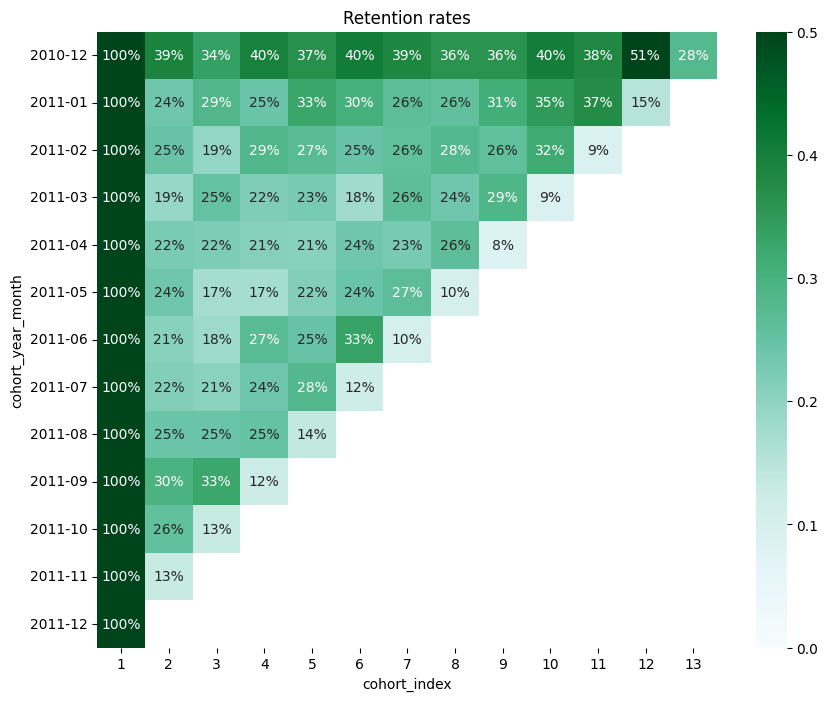

In [8]:
# Create a heatmap for retention rates
plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap='BuGn')
plt.show()

## Based on the provided data on customer retention rates across different cohorts and time periods, here are some insights:

- **Overall Decline in Retention:** There is a general trend of declining retention rates over time. This is evident as the retention percentages tend to decrease as the cohort index (months since acquisition) increases. This suggests that retaining customers becomes more challenging the longer they have been with the company.

- **Cohort Specific Insights:** For the cohort that joined in December 2010, the retention rate remains relatively high even in later months, indicating that this group of customers has shown loyalty over time. In contrast, for the cohort that joined in January 2011, the retention rate drops significantly after the first month, suggesting that many customers in this cohort did not return to make additional purchases.

- **Missing Data:** There are missing values (NaN) in the retention rate table, especially in later cohort months. This indicates incomplete data, making it difficult to calculate retention rates accurately.

- **Opportunity for Improvement:** The declining retention rates highlight the need for businesses to focus on customer engagement and retention strategies. Efforts should be made to understand why certain cohorts exhibit higher retention than others and replicate successful strategies.

- **Early Cohort Analysis:** For cohorts in the earlier months, it's essential to analyze the reasons behind the decline in retention rates. Are there specific customer segments or product categories that appear to be more susceptible to losing customers? Identifying these factors can help in devising targeted retention initiatives.

- **Long-Term Customer Value:** Cohorts with higher long-term retention rates represent valuable customer segments. Businesses should consider investing in strategies to keep these customers engaged and satisfied.

- **Comparative Analysis:** To gain deeper insights, it would be beneficial to compare these retention rates with industry benchmarks or with cohorts from previous years to identify trends and changes over time.

In summary, this data provides a starting point for understanding customer retention dynamics, but further analysis and action are required to optimize retention strategies and enhance the overall customer experience.




